In [1]:
pip install xlrd


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import re
from datetime import datetime

In [3]:
data = pd.read_excel("GSAF5.xls")

In [4]:
df_copy = data

In [5]:
data.describe()

,Year,original order
count,6932.000000,6799.000000
mean,1934.275245,3401.152081
std,273.096906,1963.076319
min,0.000000,2.000000
25%,1947.000000,1701.500000
50%,1985.000000,3401.000000
75%,2009.000000,5100.500000
max,2024.000000,6802.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6959 entries, 0 to 6958
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            6934 non-null   object 
 1   Year            6932 non-null   float64
 2   Type            6916 non-null   object 
 3   Country         6884 non-null   object 
 4   State           6452 non-null   object 
 5   Location        6370 non-null   object 
 6   Activity        6349 non-null   object 
 7   Name            6715 non-null   object 
 8   Sex             6355 non-null   object 
 9   Age             3944 non-null   object 
 10  Injury          6899 non-null   object 
 11  Unnamed: 11     6373 non-null   object 
 12  Time            3411 non-null   object 
 13  Species         3804 non-null   object 
 14  Source          6915 non-null   object 
 15  pdf             6799 non-null   object 
 16  href formula    6819 non-null   object 
 17  href            6796 non-null   o

In [7]:
data.shape

(6959, 23)

In [8]:
df_copy.sample(10)

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
6851,Before Feb-1998,0.0,Unprovoked,SOLOMON ISLANDS,Malaita Province,Waibana Passage,Diving,Albert Raiti,M,NaN,...,NaN,"Islands Magazine, 2/1998, p.76",ND-0095-AlbertRaiti.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0095,ND.0095,84.0,NaN,NaN
3726,16-Sep-1978,1978.0,Unprovoked,ITALY,Tyrrhenian Sea,Capo d'Anzio,Diving,Fabrizio Marini,M,NaN,...,"White shark, 5 m [16.5']",A. De Maddalena; Marini (1989),1978.09.16-Marini.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1978.09.16,1978.09.16,3206.0,NaN,NaN
1869,27-Apr-2008,2008.0,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Adam Tobin,M,24,...,NaN,S. Petersohn,2008.04.27-Tobin.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2008.04.27,2008.04.27,5063.0,NaN,NaN
6266,15-Mar-1895,1895.0,Unprovoked,AUSTRALIA,Queensland,Burnett River,Swimming,Nicol Pringle,M,13,...,NaN,"The Telegraph, 3/20/1895",1895.03.15-Pringle.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1895.03.15,1895.03.15,667.0,NaN,NaN
1491,15-Aug-2011,2011.0,Invalid,USA,South Carolina,"Myrtle Beach, Horry County",Playing in the surf,Rudy Varney,M,7,...,Shark involvement not confirmed,"C. Creswell; Carolina Live, 8/15/2011",2011.08.15-Varney.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2011.08.15,2011.08.15,5441.0,NaN,NaN
1309,01-Feb-2013,2013.0,Unprovoked,JAMAICA,Kingston Parish,Pedro Cays,NaN,male,M,18,...,NaN,"The Gleaner, 2/1/2013",2013.02.01-Jamaica.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2013.02.01,2013.02.01,5623.0,NaN,NaN
6800,Ca 1588.04.00,1518.0,Unprovoked,MEXICO,Yucatan,Cozumel,Swmming,A cacique (a chief),M,NaN,...,NaN,"C. Moore, GSAF",1518.04.00.R.chief.pdf,1518.04.00.R-chief.pdf,1518.04.00.R-chief.pdf,1518.04.00.R,1518.04.00.R,135.0,NaN,NaN
4116,15-Nov-1967,1967.0,Provoked,FIJI,NaN,NaN,Freediving,Stephen Wiltshire,M,21,...,NaN,H.D.Baldridge (1994) SAF Case #1537,1967.11.15-NV-Wiltshire.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1967.11.15,1967.11.15,2816.0,NaN,NaN
3233,28-Aug-1990,1990.0,Unprovoked,USA,California,"Trinidad Head, Humboldt County",Surfing,Rodney Swan,M,22,...,5 m to 6 m [16.5' to 20'] white shark,"R. Collier, pp.116-118",1990.08.28-Swan_Collier.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1990.08.28,1990.08.28,3699.0,NaN,NaN
5988,Reported 30-Nov-1912,1912.0,Sea Disaster,PHILIPPINES,NaN,NaN,Swimming from foundered vessel,Bessie Lambert,F,19,...,NaN,"C.Moore, GSAF",1912.11.30.R-Lambert.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1912.11.30.R,1912.11.30.R,945.0,NaN,NaN


In [9]:
df_copy.columns = df_copy.columns.str.lower().str.replace(" ","_").str.replace(".","_").str.replace(":","")
df_copy.dropna(how="all", inplace=True)
df_copy.rename(columns={"species_":"species"}, inplace=True)
df_copy

,date,year,type,country,state,location,activity,name,sex,age,...,species,source,pdf,href_formula,href,case_number,case_number_1,original_order,unnamed_21,unnamed_22
0,19 Jan-2024 Reprted,2024.0,Provoked,BAHRAIN,NaN,Sakhir,Fishing,Michael Smith,M,33,...,NaN,Daily Star. 1/19.2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,15 Jan 2024,2024.0,Unprovoked,BAHAMAS,Paradise Island,"Mayan Temple, Atlantis Paradise Island Resort",Swimming,male,M,10,...,NaN,"A. Currie, GSAF",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,09-Jan-2024,2024.0,Unprovoked,AUSTRALIA,South Australia,"Walkers Beach, Elliston",Surfing,Murray Adams,M,64,...,White shark,"A. Currie, GSAF",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,05-Jan-2024,2024.0,Provoked,SOUTH AFRICA,Eastern Cape Province,Papiesfontein,Fishing,male,M,62,...,Raggedtooth shark,Jacaranda fm. 1/6/2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,30 Dec-2023,2023.0,Unprovoked,USA,Hawaii,"Baby Beach, Maui",Surfing,Jason Carter,M,39,...,NaN,"Surfer, 12/31/2023",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,NaN,NaN,NaN,NaN,NaN
6955,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,NaN,NaN,NaN,NaN,NaN
6956,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,NaN,NaN,NaN,NaN,NaN
6957,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df_copy = df_copy.fillna("no_specific")
df_copy.sample(10)

,date,year,type,country,state,location,activity,name,sex,age,...,species,source,pdf,href_formula,href,case_number,case_number_1,original_order,unnamed_21,unnamed_22
6480,04-Apr-1877,1877.0,Unprovoked,AUSTRALIA,Victoria,Portarlington,Bathing,Mitchell,M,no_specific,...,no_specific,"Brisbane Courier, 4/11/1877",1877.04.04-Mitchell.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1877.04.04.,1877.04.04.,453.0,no_specific,no_specific
1952,12-Aug-2007,2007.0,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Swimming,female,F,15,...,,"S. Petersohn, GSAF",2007.08.12-girl-NewSmyrnaBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2007.08.12,2007.08.12,4980.0,no_specific,no_specific
5490,13-Aug-1936,1936.0,Unprovoked,ICELAND,Fishing Grounds,no_specific,Swept overboard,John Bond & Noel Kinch (rescuer),M,no_specific,...,no_specific,"The Guardian, 8/27/1936",1936.08.13-Iceland.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1936.08.13,1936.08.13,1442.0,no_specific,no_specific
4097,10-Mar-1968,1968.0,Unprovoked,USA,Florida,"Jensen Beach, Martin County",Surfing,Jan Icyda,M,20,...,no_specific,H.D. Baldridge (1994) SAF Case #1548,1968.03.10-Icyda.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1968.03.10,1968.03.10,2835.0,no_specific,no_specific
6723,Jun-1827,1827.0,Unprovoked,SIERRA LEONE,Western Area,Tombo Island in the Sierra Leone River,Swimming,"William Davis, of the ship Thomas Gelston",M,no_specific,...,no_specific,Edinburgh Advertiser. 9/12/1828,1827.06.00.a-Davis.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1827.06.00.a,1827.06.00.a,210.0,no_specific,no_specific
5295,17-May-1943,1943.0,Sea Disaster,CENTRAL PACIFIC,no_specific,68 miles east of Wallis Island,"S2N Navy scout plane went down, E.H. Almond & ...","E.H. Almond, US Navy radioman",M,no_specific,...,no_specific,"V.M. Coppleson (1962), p.217; G.A. Llano in Ai...",1943.05.17.a-Almond.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1943.05.17.a,1943.05.17.a,1637.0,no_specific,no_specific
3349,14-Apr-1988,1988.0,Unprovoked,USA,Florida,"Singer Island, Riviera Beach, Palm Beach County",Surfing,Kenny Burns,M,14,...,no_specific,"St. Petersburg Times, 2/6/1999",1988.04.14.b-KennyBurns.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1988.04.14.b,1988.04.14.b,3583.0,no_specific,no_specific
2225,11-Dec-2004,2004.0,Unprovoked,AUSTRALIA,Queensland,Opal Reef,Spearfishing,Mark Thompson,M,38,...,Bull shark,"Weekend Australian, 2/17/2005, et al.",2004.12.11-Thompson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2004.12.11,2004.12.11,4707.0,no_specific,no_specific
5660,06-Aug-1930,1930.0,Unprovoked,USA,Florida,"Palm Beach Inlet, Palm Beach County",Swimming,Captain W. Kemp,M,no_specific,...,no_specific,"Palm Beach Post, 8/7/1930",1930.08.06-Kemp.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1930.08.06,1930.08.06,1273.0,no_specific,no_specific
6322,9-Aug-1890,1890.0,Unprovoked,USA,Connecticut,"Bridgeport, Fairfield County",Treading for clams,Raymond Odell,M,no_specific,...,no_specific,"NY Times, 8/12/1890",1890.08.09-Odell.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1890.08.09,1890.08.09,611.0,no_specific,no_specific


In [11]:
df_copy = df_copy.drop('unnamed_21', axis=1)
df_copy = df_copy.drop('unnamed_22', axis=1)
df_copy = df_copy.drop('unnamed_11', axis=1)
df_copy.sample(10)

,date,year,type,country,state,location,activity,name,sex,age,injury,time,species,source,pdf,href_formula,href,case_number,case_number_1,original_order
931,13-Dec-2015,2015.0,Watercraft,AUSTRALIA,New South Wales,Lake Macquarie,Fishing,6 m boat: occupants Stephen & Andrew Crust,no_specific,no_specific,"No injury, shark rammed boat & bit motor",10h30,"White shark, 3.5 m","Courier Mail, 12/15/2015",2015.12.13-Crust-Boat.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2015.12.13,2015.12.13,6002.0
1126,02-Aug-2014,2014.0,Unprovoked,USA,Florida,"South of Cocoa Beach, Brevard County",Surfing,male,M,50s,Foot bitten,no_specific,no_specific,"Florida Today, 8/8/2014",2014.08.08-CocoaBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2014.08.02,2014.08.02,5806.0
6385,26-Jan-1886,1886.0,Unprovoked,AUSTRALIA,Queensland,no_specific,Diving alongsidethe steamship Ranelagh,John Byrne,M,no_specific,Foot bitten,no_specific,no_specific,"Brisbane Courier, 1/27/1886",1886.01.26-Byrne.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1886.01.26,1886.01.26,548.0
1393,02-Jun-2012,2012.0,Unprovoked,USA,South Carolina,"Myrtle Beach, Horry County",Boogie Boarding,Ryan Orellana-Maczynski,M,25,Severe laceration to foot,19h45,no_specific,C. Creswell,2012.06.02.a-Maczynski.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2012.06.02.a,2012.06.02.a,5539.0
3496,07-Aug-1984,1984.0,Unprovoked,INDONESIA,no_specific,Bali,"Sea disaster, foundering of the cargo vessle M...",9 crewmen,M,no_specific,FATAL,no_specific,no_specific,"Courier Mail, 8/15/1984",1984.08.07-Dorolonda.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1984.08.07,1984.08.07,3436.0
397,06-Apr-2020,2020.0,Unprovoked,AUSTRALIA,Queensland,North West Island,Swimming,Zach Robba,M,23,FATAL,17h30,no_specific,"B. Myatt, R. Collier & M. Michaelson, GSAF and...",2020.04.06.b-Robba.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2020.04.06.b,2020.04.06.b,6535.0
165,22-Jun-2022,2022.0,Unprovoked,USA,California,"Pacific Grove, Monterey County",Swimming,Steve Breummer,M,62,Stomach and leg injuries including a broken femur,10h40,"White shark, 16'","M. Michaelson, and R. Collier, GSAF",2022.06.22-Breummer.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2022.06.22,2022.06.22,6767.0
666,02-Nov-2017,2017.0,Unprovoked,USA,Hawaii,Makaha,Surfing,male,M,20s,Minor cuts to lower left leg,14h15,no_specific,"Star Advertiser, 11/2/2017",2017.11.02-Makaha.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.11.02,2017.11.02,6267.0
1197,11-Dec-2013,2013.0,Unprovoked,USA,Hawaii,"Ninole Bay, Hawaii County",Boogie boarding,male,M,29,Lacerations to right hand & knee,08h00,"Tiger shark, 10' to 12'","Big Island Now, 12/11/2013",2013.12.11-Hawaii.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2013.12.11,2013.12.11,5735.0
5227,24-Jan-1946,1946.0,Unprovoked,SOUTH AFRICA,KwaZulu-Natal,"Battery Beach, Durban",Swimming,"Manduray, a lifesaver",M,no_specific,Foot severely lacerated,Afternoon,no_specific,"J. R. Varma; M. Levine, GSAF",1946.01.24.a-Manduray.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1946.01.24.a,1946.01.24.a,1705.0


In [12]:
df_copy['activity'].unique()


array(['Fishing', 'Swimming', 'Surfing', ...,
       'Crew swimming alongside their anchored ship',
       '4 men were bathing', 'Wreck of  large double sailing canoe'],
      dtype=object)

In [13]:
df_copy.loc[df_copy['activity'].str.contains('Swim', case=False, na=False), 'activity'] = 'Swimming'
df_copy.loc[df_copy['activity'].str.contains('Bat', case=False, na=False), 'activity'] = 'Bathing'
df_copy.loc[df_copy['activity'].str.contains('Sur', case=False, na=False), 'activity'] = 'Surf'
df_copy.loc[df_copy['activity'].str.contains('fis|net', case=False, na=False), 'activity'] = 'Fishing'
df_copy.loc[df_copy['activity'].str.contains('div', case=False, na=False), 'activity'] = 'Diving'
df_copy.loc[df_copy['activity'].str.contains('Fell', case=False, na=False), 'activity'] = 'Fell into the water'
df_copy.loc[df_copy['activity'].str.contains('Flo|Treading water', case=False, na=False), 'activity'] = 'Floating'
df_copy.loc[df_copy['activity'].str.contains('Paddle', case=False, na=False), 'activity'] = 'Paddle boarding'
df_copy.loc[df_copy['activity'].str.contains('Jum', case=False, na=False), 'activity'] = 'Jumping'
df_copy.loc[df_copy['activity'].str.contains('Phot|fil', case=False, na=False), 'activity'] = 'Photography and filming'
df_copy.loc[df_copy['activity'].str.contains('Air', case=False, na=False), 'activity'] = 'Air Disaster'
df_copy.loc[df_copy['activity'].str.contains('Feed', case=False, na=False), 'activity'] = 'Feeding a shark'
df_copy.loc[df_copy['activity'].str.contains('cano', case=False, na=False), 'activity'] = 'Canoe'
df_copy.loc[df_copy['activity'].str.contains('Bod', case=False, na=False), 'activity'] = 'Body boarding'
df_copy

,date,year,type,country,state,location,activity,name,sex,age,injury,time,species,source,pdf,href_formula,href,case_number,case_number_1,original_order
0,19 Jan-2024 Reprted,2024.0,Provoked,BAHRAIN,no_specific,Sakhir,Fishing,Michael Smith,M,33,Provoked incident. Hand injured by hooked shark.,no_specific,no_specific,Daily Star. 1/19.2024,no_specific,no_specific,no_specific,no_specific,no_specific,no_specific
1,15 Jan 2024,2024.0,Unprovoked,BAHAMAS,Paradise Island,"Mayan Temple, Atlantis Paradise Island Resort",Swimming,male,M,10,Leg bitten,16h00,no_specific,"A. Currie, GSAF",no_specific,no_specific,no_specific,no_specific,no_specific,no_specific
2,09-Jan-2024,2024.0,Unprovoked,AUSTRALIA,South Australia,"Walkers Beach, Elliston",Surf,Murray Adams,M,64,Leg bitten,13h00,White shark,"A. Currie, GSAF",no_specific,no_specific,no_specific,no_specific,no_specific,no_specific
3,05-Jan-2024,2024.0,Provoked,SOUTH AFRICA,Eastern Cape Province,Papiesfontein,Fishing,male,M,62,Provoked incident. Lacerations and puncture wo...,no_specific,Raggedtooth shark,Jacaranda fm. 1/6/2024,no_specific,no_specific,no_specific,no_specific,no_specific,no_specific
4,30 Dec-2023,2023.0,Unprovoked,USA,Hawaii,"Baby Beach, Maui",Surf,Jason Carter,M,39,FATAL,11h12,no_specific,"Surfer, 12/31/2023",no_specific,no_specific,no_specific,no_specific,no_specific,no_specific
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6954,no_specific,no_specific,no_specific,no_specific,no_specific,no_specific,no_specific,no_specific,no_specific,no_specific,no_specific,no_specific,no_specific,no_specific,no_specific,http://sharkattackfile.net/spreadsheets/pdf_di...,no_specific,no_specific,no_specific,no_specific
6955,no_specific,no_specific,no_specific,no_specific,no_specific,no_specific,no_specific,no_specific,no_specific,no_specific,no_specific,no_specific,no_specific,no_specific,no_specific,http://sharkattackfile.net/spreadsheets/pdf_di...,no_specific,no_specific,no_specific,no_specific
6956,no_specific,no_specific,no_specific,no_specific,no_specific,no_specific,no_specific,no_specific,no_specific,no_specific,no_specific,no_specific,no_specific,no_specific,no_specific,http://sharkattackfile.net/spreadsheets/pdf_di...,no_specific,no_specific,no_specific,no_specific
6957,no_specific,no_specific,no_specific,no_specific,no_specific,no_specific,no_specific,no_specific,no_specific,no_specific,no_specific,no_specific,no_specific,no_specific,no_specific,http://sharkattackfile.net/spreadsheets/pdf_di...,no_specific,no_specific,no_specific,no_specific


In [14]:
df_copy['age'].unique()

array(['33', '10', '64', '62', '39', '22', '15', '16', '46', '21', '66',
       '52', '20', '44', '26', '47', '32', 'no_specific', '55', '30',
       '59', '8', '50', '45', '34', '38', '30s', '37', '9', '19', '20/30',
       '35', '65', '20s', '77', '60', 38, '49', '42', '!2', '24', '73',
       '25', '18', '13', '50s', '11', '58', '67', '14', '6', '41', '53',
       '68', '43', '29', '40', '51', '17', '31', 39, 26, 58, 51, 14, 17,
       10, 13, 33, 16, 40, 49, 41, 60, 28, '40s', 68, 35, 62, 'teen', 20,
       8, 22, 32, 56, 'Teen', 12, 21, 42, 36, 18, 37, 50, 'M', 9, 24, 15,
       11, 27, 57, 34, 25, '!6', 31, 64, '!!', 47, 55, 19, 7, 71, 48, 59,
       53, 54, 75, '45 and 15', 46, 61, 73, 52, 29, 30, 70, 23, 4, 63, 45,
       44, '28 & 22', '22, 57, 31', '60s', "20's", 43, 65, 67, 74,
       '9 & 60', 'a minor', 6, 69, 3, 82, 66, 72, '23', '12', '36', '63',
       '71', '48', '70', '18 months', '57', '7', '28', '61', '74', '27',
       '3', '56', '28 & 26', '5', '54', '86', '18 or 

In [15]:
df_copy['age'].fillna(0, inplace=True)

replace_patterns = lambda x: re.sub(r"\b30s\b", "35",
                             re.sub(r"\b20/30\b", "25",
                             re.sub(r"\b20s\b", "25",
                             re.sub(r"\b!2\b", "2",
                             re.sub(r"\b50s\b", "55",
                             re.sub(r"\b40s\b", "45",
                             re.sub(r"\bteen\b", "15",
                             re.sub(r"\bTeen\b", "15",
                             re.sub(r"\bM\b", "0",
                             re.sub(r"\b!6\b", "6",
                             re.sub(r"\b!!\b", "0",
                             re.sub(r"\b45 and 15\b", "30", x))))))))))))

df_copy['age'] = df_copy['age'].astype(str).apply(replace_patterns)

df_copy['age'] = pd.to_numeric(df_copy['age'], errors='coerce').fillna(0).astype(int)

df_copy


,date,year,type,country,state,location,activity,name,sex,age,injury,time,species,source,pdf,href_formula,href,case_number,case_number_1,original_order
0,19 Jan-2024 Reprted,2024.0,Provoked,BAHRAIN,no_specific,Sakhir,Fishing,Michael Smith,M,33,Provoked incident. Hand injured by hooked shark.,no_specific,no_specific,Daily Star. 1/19.2024,no_specific,no_specific,no_specific,no_specific,no_specific,no_specific
1,15 Jan 2024,2024.0,Unprovoked,BAHAMAS,Paradise Island,"Mayan Temple, Atlantis Paradise Island Resort",Swimming,male,M,10,Leg bitten,16h00,no_specific,"A. Currie, GSAF",no_specific,no_specific,no_specific,no_specific,no_specific,no_specific
2,09-Jan-2024,2024.0,Unprovoked,AUSTRALIA,South Australia,"Walkers Beach, Elliston",Surf,Murray Adams,M,64,Leg bitten,13h00,White shark,"A. Currie, GSAF",no_specific,no_specific,no_specific,no_specific,no_specific,no_specific
3,05-Jan-2024,2024.0,Provoked,SOUTH AFRICA,Eastern Cape Province,Papiesfontein,Fishing,male,M,62,Provoked incident. Lacerations and puncture wo...,no_specific,Raggedtooth shark,Jacaranda fm. 1/6/2024,no_specific,no_specific,no_specific,no_specific,no_specific,no_specific
4,30 Dec-2023,2023.0,Unprovoked,USA,Hawaii,"Baby Beach, Maui",Surf,Jason Carter,M,39,FATAL,11h12,no_specific,"Surfer, 12/31/2023",no_specific,no_specific,no_specific,no_specific,no_specific,no_specific
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6954,no_specific,no_specific,no_specific,no_specific,no_specific,no_specific,no_specific,no_specific,no_specific,0,no_specific,no_specific,no_specific,no_specific,no_specific,http://sharkattackfile.net/spreadsheets/pdf_di...,no_specific,no_specific,no_specific,no_specific
6955,no_specific,no_specific,no_specific,no_specific,no_specific,no_specific,no_specific,no_specific,no_specific,0,no_specific,no_specific,no_specific,no_specific,no_specific,http://sharkattackfile.net/spreadsheets/pdf_di...,no_specific,no_specific,no_specific,no_specific
6956,no_specific,no_specific,no_specific,no_specific,no_specific,no_specific,no_specific,no_specific,no_specific,0,no_specific,no_specific,no_specific,no_specific,no_specific,http://sharkattackfile.net/spreadsheets/pdf_di...,no_specific,no_specific,no_specific,no_specific
6957,no_specific,no_specific,no_specific,no_specific,no_specific,no_specific,no_specific,no_specific,no_specific,0,no_specific,no_specific,no_specific,no_specific,no_specific,http://sharkattackfile.net/spreadsheets/pdf_di...,no_specific,no_specific,no_specific,no_specific


In [16]:
df_copy.tail(50)


,date,year,type,country,state,location,activity,name,sex,age,injury,time,species,source,pdf,href_formula,href,case_number,case_number_1,original_order
6909,Before 1927,0.0,Unprovoked,AUSTRALIA,New South Wales,"Spectacle Island, Port Jackson",no_specific,"male, the Sergeant of Marines",M,0,no_specific,no_specific,no_specific,H. Capper,ND-0025-Sgt-SpectacleIsland.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0025,ND.0025,26.0
6910,Between 1918 & 1939,0.0,Unprovoked,REUNION,Saint-Denis,Barachois,Swimming,no_specific,no_specific,0,FATAL,no_specific,no_specific,G. Van Grevelynghe,ND-0024-Barachois-Reunion.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0024,ND.0024,25.0
6911,No date,0.0,Unprovoked,SOUTH AFRICA,Western Cape Province,Arniston,Wading,Madelaine Dalton,F,0,Ankle bitten,no_specific,no_specific,"L. Green in Tavern of the Seas, p.182",ND-0023-Dalton.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0023,ND.0023,24.0
6912,No date,0.0,Unprovoked,AUSTRALIA,no_specific,no_specific,Diving,Jaringoorli,M,0,Lacerations to thigh,no_specific,no_specific,"Adelaide Advertiser, 1/11/1940",ND-0022-Jaringoorli.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0022,ND.0022,23.0
6913,No date,0.0,Unprovoked,SOUTH AFRICA,KwaZulu-Natal,Durban,Swimming,Indian boy,M,0,"FATAL, leg severed",no_specific,no_specific,"L. Green in South African Beachcomber, p.97",ND-0021-DurbanIndianBoy.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0021,ND.0021,22.0
6914,1920 -1923,0.0,Unprovoked,AUSTRALIA,Queensland,Great Barrier Reef,no_specific,3 Japanese divers,M,0,FATAL,no_specific,no_specific,"V.M. Coppleson (1958), p.241",ND-0020-3JapaneseDivers.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0020,ND.0020,21.0
6915,Before 1921,0.0,Unprovoked,USA,Florida,"Gadsden Point, Tampa Bay",Fishing,James Kelley,M,0,2-inch lacerations,no_specific,no_specific,"T. Helm, p.219",ND-0019-Kelley.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0019,ND.0019,20.0
6916,Before 1911,0.0,Unprovoked,VIETNAM,Ba Ria-Vung Tau Province,Vũng Tàu,Swimming,crewman,M,0,Foot bitten,no_specific,no_specific,"Daily Kennebec Journal, 3/27/1911",ND-0018-Vietnam.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0018,ND.0018,19.0
6917,Before 1921,0.0,Unprovoked,SOUTH AFRICA,KwaZulu-Natal,Durban,Swimming,male,M,0,FATAL,no_specific,no_specific,"Captain A. Anderson, Natal Mercury, 12/31/192...",ND-0017-alongside-ship.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0017,ND.0017,18.0
6918,Before 1921,0.0,Unprovoked,SOUTH AFRICA,KwaZulu-Natal,Durban,Bathing,male,M,0,FATAL,no_specific,no_specific,"Captain A. Anderson, Natal Mercury, 12/31/192...",ND-0016- Durban-PostOffice.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0016,ND.0016,17.0


In [17]:

df_copy.drop(range(6934, 6959), inplace=True)
df_copy.reset_index(drop=True, inplace=True)

df_copy

,date,year,type,country,state,location,activity,name,sex,age,injury,time,species,source,pdf,href_formula,href,case_number,case_number_1,original_order
0,19 Jan-2024 Reprted,2024.0,Provoked,BAHRAIN,no_specific,Sakhir,Fishing,Michael Smith,M,33,Provoked incident. Hand injured by hooked shark.,no_specific,no_specific,Daily Star. 1/19.2024,no_specific,no_specific,no_specific,no_specific,no_specific,no_specific
1,15 Jan 2024,2024.0,Unprovoked,BAHAMAS,Paradise Island,"Mayan Temple, Atlantis Paradise Island Resort",Swimming,male,M,10,Leg bitten,16h00,no_specific,"A. Currie, GSAF",no_specific,no_specific,no_specific,no_specific,no_specific,no_specific
2,09-Jan-2024,2024.0,Unprovoked,AUSTRALIA,South Australia,"Walkers Beach, Elliston",Surf,Murray Adams,M,64,Leg bitten,13h00,White shark,"A. Currie, GSAF",no_specific,no_specific,no_specific,no_specific,no_specific,no_specific
3,05-Jan-2024,2024.0,Provoked,SOUTH AFRICA,Eastern Cape Province,Papiesfontein,Fishing,male,M,62,Provoked incident. Lacerations and puncture wo...,no_specific,Raggedtooth shark,Jacaranda fm. 1/6/2024,no_specific,no_specific,no_specific,no_specific,no_specific,no_specific
4,30 Dec-2023,2023.0,Unprovoked,USA,Hawaii,"Baby Beach, Maui",Surf,Jason Carter,M,39,FATAL,11h12,no_specific,"Surfer, 12/31/2023",no_specific,no_specific,no_specific,no_specific,no_specific,no_specific
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6929,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,0,FATAL,no_specific,no_specific,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6.0
6930,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,no_specific,Diving,Ahmun,M,0,FATAL,no_specific,no_specific,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5.0
6931,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,0,FATAL,no_specific,no_specific,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4.0
6932,1883-1889,0.0,Unprovoked,PANAMA,no_specific,"Panama Bay 8ºN, 79ºW",no_specific,Jules Patterson,M,0,FATAL,no_specific,no_specific,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3.0


In [18]:
df_copy["date"].unique()

array(['19 Jan-2024 Reprted', '15 Jan 2024', '09-Jan-2024', ...,
       '1900-1905', '1883-1889', '1845-1853'], dtype=object)

In [19]:
df_copy.sample(10)

,date,year,type,country,state,location,activity,name,sex,age,injury,time,species,source,pdf,href_formula,href,case_number,case_number_1,original_order
4176,23-Aug-1966,1966.0,Unprovoked,NEW BRITAIN,Duke of York Islands,"Butliwan Village, 15 miles north of Rabaul",Swimming,Memilana Bokset (female - rescuer),F,13,FATAL,Midday,A pack of 6 sharks,"Age (Melbourne), Hudderfield Daily Examiner (Y...",1966.08.21.b-Bokset.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1966.08.21.b,1966.08.21.b,2756.0
124,10-Oct-2022,2022.0,Provoked,USA,Florida,"Key Largo, Monroe County",Fishing,Malec Mata,M,15,Minor injury to leg by hooked shark,no_specific,Juvenile nurse shark,"NBC Miami, 10/10/2022",no_specific,no_specific,no_specific,no_specific,no_specific,no_specific
5162,19-Aug-1948,1948.0,Unprovoked,IRAN,Shatt-al-Arab River,no_specific,no_specific,Abdul Hussain,M,13,"FATAL, right arm severely bitten & surgically...",no_specific,no_specific,"A. Anderson, M.D. / Lt. Col. R.S. Hunt, Royal ...",1948.08.19-Hussain.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1948.08.19,1948.08.19,1770.0
3548,June 1983,1983.0,Unprovoked,BAHAMAS,Berry Islands,Whale Cay,Fishing,Carl Starling,M,0,Lacerations to thigh & buttocks,17h00,Caribbean reef shark,"E. Pace, FSAF & M. Levine, GSAF",1983.06.00-Starling,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1983.06.00,1983.06.00,3384.0
6415,1883,1883.0,Invalid,USA,South Carolina,"Bull’s Bay, near Charleston",no_specific,adult male,M,0,"Body found with arm severed by shark, but shar...",no_specific,Shark involvement prior to death unconfirmed,"W.H. Gregg, p.21; SAF Case #910",1883.00.00.b-BullsBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1883.00.00.b,1883.00.00.b,518.0
435,09-Nov-2019,2019.0,Watercraft,SOUTH AFRICA,Eastern Cape Province,East London,Fishing,Bradley Beamish,M,0,"No injury, kayak damaged",06h50,"White shark, 4 m","Kevin McMurray, TrackingSharks.com",2019.11.09-Beamish.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2019.11.09,2019.11.09,6497.0
4041,02-Aug-1969,1969.0,Unprovoked,USA,Florida,"St. Petersburg, Pinnellas County",Surf,Robert Wamser,M,13,Lacerations to right lower leg & left arm and ...,16h30,4' shark,"NYTimes, 8/3/1969",1969.08.01-Wamser.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1969.08.01,1969.08.01,2891.0
2041,02-Sep-2006,2006.0,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Swimming,male,M,0,Arm bitten,17h55,no_specific,"S. Petersohn, GSAF",2006.09.02.b-Child-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2006.09.02,2006.09.02,4891.0
5661,19-Jul-1930,1930.0,Unprovoked,CUBA,Havana Province,"LaPlaya Beach / Vedado, Havana",Swimming,Emilio Grenet,M,29,"Right arm & leg bitten, arm & leg surgically a...",Evening,no_specific,"NY Times, 7/21/1930, p.7 & 8/27/1931; V.M. Cop...",1930.07.19-Grenet.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1930.07.19,1930.07.19,1272.0
4463,14-Jan-1962,1962.0,Unprovoked,USA,California,Farallon Islands,Surf,"Floyd Pair, Jr.",M,29,Buttock bitten & major leg wound,10h30,"White shark, 4 m [13']","D. Miller & R. Collier; R. Collier, pp.34-35; ...",1962.01.14.c-Pair_Collier.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1962.01.14.c,1962.01.14.c,2469.0


In [20]:
df_copy["date"]

0       19 Jan-2024 Reprted
1               15 Jan 2024
2               09-Jan-2024
3               05-Jan-2024
4               30 Dec-2023
               ...         
6929            Before 1903
6930            Before 1903
6931              1900-1905
6932              1883-1889
6933              1845-1853
Name: date, Length: 6934, dtype: object

In [21]:
df_copy['year'] = df_copy['year'].astype(str)

df_copy["year"] = df_copy["year"].str.replace(".0", "")

df_copy.loc[df_copy['year'].str.contains('nan', case=False, na=False), 'year'] = '0'

df_copy['year'] = pd.to_numeric(df_copy['year'], errors='coerce', downcast='integer').fillna(0).astype(int)

df_copy['year'] = df_copy['year'].apply(lambda x: 1500 if x < 1600 else
                                         1600 if 1600 <= x < 1700 else
                                         1700 if 1700 <= x < 1800 else
                                         1800 if 1800 <= x < 1900 else
                                         1900 if 1900 <= x < 1950 else
                                         1950 if 1950 <= x < 2000 else
                                         2000 if 2000 <= x < 2010 else
                                         2010 if 2010 <= x < 2020 else
                                         2020 if 2020 <= x < 2030 else x)

print(df_copy['year'].value_counts())
df_copy.info()

year
1950    2434
2010    1244
1900    1067
2000    1022
1800     571
2020     417
1500     141
1700      31
1600       7
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6934 entries, 0 to 6933
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            6934 non-null   object
 1   year            6934 non-null   int64 
 2   type            6934 non-null   object
 3   country         6934 non-null   object
 4   state           6934 non-null   object
 5   location        6934 non-null   object
 6   activity        6934 non-null   object
 7   name            6934 non-null   object
 8   sex             6934 non-null   object
 9   age             6934 non-null   int32 
 10  injury          6934 non-null   object
 11  time            6934 non-null   object
 12  species         6934 non-null   object
 13  source          6934 non-null   object
 14  pdf             6934 non-null   obje

In [22]:
trash_words=['Reported','Reprted','reported','before','Before','Late']
df_copy['date'] = df_copy['date'].astype(str)
df_copy = df_copy[~df_copy['date'].map(lambda x: x in trash_words)]
df_copy['date'] = pd.to_datetime(df_copy['date'], errors='coerce')
df_copy.sample(15)

C:\Users\Carlos\AppData\Local\Temp\ipykernel_17600\1994028641.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_copy['date'] = pd.to_datetime(df_copy['date'], errors='coerce')


,date,year,type,country,state,location,activity,name,sex,age,injury,time,species,source,pdf,href_formula,href,case_number,case_number_1,original_order
1925,2007-09-30,2000,Sea Disaster,PHILIPPINES,Palawan,Off Cagayancillo,"The 426-ton cargo ship Mia, laden with cement,...",no_specific,M,0,FATAL Only 4 of the 18 on board were re...,14h40,no_specific,"Cebu Daily News, 10/3/2007",2007.09.30.b-Mia.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2007.09.30.b,2007.09.30.b,5007.0
1240,2013-08-25,2010,Unprovoked,AUSTRALIA,New South Wales,Smiths,Wrangling a shark,Otto Lee,M,0,Lacerations to left forearm,15h00,no_specific,"Great Lakes Advocate, 8/28/2013",2013.08.25-Breihan.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2013.08.25,2013.08.25,5692.0
5845,1922-05-24,1900,Unprovoked,JAMAICA,Westmoreland Parish,Savanna-la-Mar,Swimming,Sausse Leon,M,19,"FATAL, arm severed, thigh severely bitten",10h00,6' shark,"Daily Gleaner, 5/25/1922; H.E. Lloyd, NY Times...",1922.05.24-Leon.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1922.05.24,1922.05.24,1088.0
298,2021-02-20,2020,Provoked,AUSTRALIA,Queensland,Waterford West,Fishing,Jason Rogers,M,0,Superficial wound PROVOKED INCIDENT,17h30,"Bull shark, 80cm","S. De Marchi, GSAF",2021.02.20-Rogers.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2021.02.20,2021.02.21,6634.0
766,2017-04-05,2010,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Swimming,Melanie Lawson,F,51,"Thigh nipped, minor injury",13h00,no_specific,"AJC, 4/5/2017",2017.04.05-NSB.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.04.05,2017.04.05,6167.0
6466,1878-09-02,1800,Sea Disaster,SOUTH ATLANTIC OCEAN,Off the coast of West Africa,no_specific,Boat with 5 men capsized while returning to th...,no_specific,M,0,"FATAL, 2 of the crew were killed by sharks",no_specific,no_specific,"Brisbane Courier, 11/19/1878",1878.09.02.a-Amerique.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1878.09.02.a,1878.09.02.a,467.0
444,2019-10-05,2010,Unprovoked,AUSTRALIA,New South Wales,Lighthouse Beach,Surf,Mike Bruton,M,29,"No injury, surfboard severely damaged",16h00,"White shark, 3.5 m",B.Myatt & M. Michaelson GSAF,2019.10.05.b-Bruton.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2019.10.05.b,2019.10.05.b,6488.0
6795,NaT,1500,Unprovoked,INDIA,Kerala,River Cochin,Ship lay at anchor & man was working on its ru...,male,M,0,"Leg severed mid-thigh, hand severed, arm above...",no_specific,no_specific,The Voyage of John Huyghen van Linschoten,1595.00.00-Cochin.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1595.00.00,1595.00.00,140.0
2676,2000-02-21,2000,Unprovoked,USA,Florida,"Riviera Beach, Palm Beach County",no_specific,male,M,27,Right calf bitten,Afternoon,no_specific,"The Palm Beach Post, 2/22/2000",2000.02.21-male-Riviera Beach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2000.02.21,2000.02.21,4256.0
2056,2006-07-29,2000,Invalid,USA,California,"Broad Beach, Malibu, Los Angeles County",Boogie Boarding,Bruce Lurie,M,0,"Bruises, laceration to head, spinal cord injur...",Afternoon,"Thought to involve a mako shark, but possibly ...","R. Colier, GSAF",2006.07.29.b-Lurie.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2006.07.29.b,2006.07.29.b,4876.0


In [23]:
df_copy = df_copy.drop('year', axis=1)
df_copy = df_copy.drop('case_number_1', axis=1)
df_copy = df_copy.drop('case_number', axis=1)
df_copy.head(30)

,date,type,country,state,location,activity,name,sex,age,injury,time,species,source,pdf,href_formula,href,original_order
0,NaT,Provoked,BAHRAIN,no_specific,Sakhir,Fishing,Michael Smith,M,33,Provoked incident. Hand injured by hooked shark.,no_specific,no_specific,Daily Star. 1/19.2024,no_specific,no_specific,no_specific,no_specific
1,2024-01-15,Unprovoked,BAHAMAS,Paradise Island,"Mayan Temple, Atlantis Paradise Island Resort",Swimming,male,M,10,Leg bitten,16h00,no_specific,"A. Currie, GSAF",no_specific,no_specific,no_specific,no_specific
2,2024-01-09,Unprovoked,AUSTRALIA,South Australia,"Walkers Beach, Elliston",Surf,Murray Adams,M,64,Leg bitten,13h00,White shark,"A. Currie, GSAF",no_specific,no_specific,no_specific,no_specific
3,2024-01-05,Provoked,SOUTH AFRICA,Eastern Cape Province,Papiesfontein,Fishing,male,M,62,Provoked incident. Lacerations and puncture wo...,no_specific,Raggedtooth shark,Jacaranda fm. 1/6/2024,no_specific,no_specific,no_specific,no_specific
4,2023-12-30,Unprovoked,USA,Hawaii,"Baby Beach, Maui",Surf,Jason Carter,M,39,FATAL,11h12,no_specific,"Surfer, 12/31/2023",no_specific,no_specific,no_specific,no_specific
5,2023-12-29,Unprovoked,MEXICO,Sonora,"Tojahui Beach, Yavaros, Huatabampo",Diving,Víctor Alejandro “N”,M,22,FATAL,13h00,White shark,"EuroESEuro, 12/31/2023",no_specific,no_specific,no_specific,no_specific
6,2023-12-28,Unprovoked,AUSTRALIA,South Australia,Ethel Beach,Surf,Khai Cowley,M,15,FATAL,13h30,"White shark, 13'","S. DeMarchi, GSAF",no_specific,no_specific,no_specific,no_specific
7,2023-12-25,Unprovoked,AUSTRALIA,New South Wales,Old Bar,Surf,Julian McLennan,M,16,Injury to right thigh,16h30,no_specific,"9 News, 12/26/2023",no_specific,no_specific,no_specific,no_specific
8,2023-12-24,Unprovoked,AUSTRALIA,Western Australia,Wedge Island,Foil Boarding,Troy Brown,M,46,Puncture wounds to right ankle,15h00,Broze whaler?,"9 News, 12/25/2023",no_specific,no_specific,no_specific,no_specific
9,2023-12-18,Unprovoked,NEW ZEALAND,South Island,Riverton,Wading,female,F,21,Significant injury to leg,02h00,Sevengill shark,"NZ Herald, 12/18/2023",no_specific,no_specific,no_specific,no_specific


In [24]:
df_copy["sex"].unique()

array(['M', 'F', 'no_specific', ' M', 'M ', 'lli', 'M x 2', 'N', '.'],
      dtype=object)

In [25]:
df_copy.loc[df_copy['sex'].str.contains( ' M', case=False, na=False), 'sex'] = 'M'
df_copy.loc[df_copy['sex'].str.contains( 'M ', case=False, na=False), 'sex'] = 'M'
df_copy.loc[df_copy['sex'].str.contains('lli', case=False, na=False), 'sex'] = 'OTRO'
df_copy.loc[df_copy['sex'].str.contains('M x 2', case=False, na=False), 'sex'] = 'M'
df_copy.loc[df_copy['sex'].str.contains('N', case=False, na=False), 'sex'] = 'F'
df_copy.loc[df_copy['sex'].str.contains('F', case=False, na=False), 'sex'] = 'F'
df_copy.loc[df_copy['sex'].str.contains('M', case=False, na=False), 'sex'] = 'M'
df_copy.loc[df_copy['sex'].str.contains('no_specific', case=False, na=False), 'sex'] = 'OTRO'


df_copy.sample(10)

,date,type,country,state,location,activity,name,sex,age,injury,time,species,source,pdf,href_formula,href,original_order
3338,1988-06-16,Unprovoked,USA,North Carolina,"Ocracoke, Hyde County",Diving,male,M,42,Survived,no_specific,Sandtiger shark,"C. Creswell, GSAF",1988.06.16-diver.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,3594.0
2215,2005-02-22,Provoked,USA,Florida,"Long Key, Monroe County",Fishing,Alex Mumzhiu,M,0,Speared shark bit his chest PROVOKED INCIDENT,no_specific,"Nurse shark, 3'",http://www.foldabikes.com/CurrentEvents/Story/...,2005.02.22-AlexMumzhiu.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,4717.0
2907,1996-05-28,Unprovoked,SOUTH AFRICA,Western Cape Province,"The Steps, Wilderness",Surf,Donovan Köhne,M,17,Leg bitten,14h45,2.5 m [8.25'] white shark,"A. Gifford, GSAF",1996.05.28-Kohne.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,4025.0
4516,1961-05-15,Unprovoked,USA,Florida,"Laguna Beach, Bay County",Walking in chest-deep water,G.L. Morris,M,52,Middle finger of left hand & right forearm lac...,11h30,"Hammerhead shark, 500-llb","G.L. Morris; Post Herald (Birmingham, Alabama)...",1961.05.15-Morris.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2416.0
1499,2011-07-15,Watercraft,REUNION,Saint-Gilles,Brisants.,Kayaking or Wave skiing,male,M,0,No injury,17h00,no_specific,"Le Post, 7/19/2011",2011.07.15-Reunion-kayaker.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,5433.0
107,2023-01-01,Provoked,USA,Florida,70 miles off Pensacola,Spearishing,Chad Petti,M,30,Knocked spear out of his hands and fin bitten,14h50,Mako shark,"A. Currie, GSAF",no_specific,no_specific,no_specific,no_specific
2359,2003-07-20,Unprovoked,USA,Florida,"Ponce Inlet, New Smyrna Beach, Volusia County",Surf,John McGovern,M,18,Laceration to little finger of right hand,15h45,no_specific,"S. Petersohn, GSAF",2003.07.20-McGovern.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,4573.0
1086,2014-10-29,Provoked,AUSTRALIA,New South Wales,Wallabi Point,Surf,Ryan Hunt,M,20,Laceration to dorsum of left foot when he step...,18h00,no_specific,"The Sydney Morning Herald, 10/30/2014",2014.10.29-Hunt.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,5847.0
6625,1855-07-28,Unprovoked,no_specific,no_specific,no_specific,Bathing,"a young boy, one of the crew of the Post Boy",M,0,FATAL,no_specific,no_specific,"Maitland Mercury, 8/25/1855",1855.07.28-PostBoy-sailors.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,308.0
4685,1959-08-20,Invalid,PHILIPPINES,North Palawan,Cabuli Island,The 240-ton motor vessel Pilar II with 100 peo...,boy,M,10,"Navy personnel reported that his body was ""mut...",04h00,Shark involvement prior to death was not confi...,"Manila Daily, 8/26/1959; V.M. Coppleson (1962)...",1959.08.20-PilarII.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2247.0


In [26]:
df_copy["time"].unique()

array(['no_specific', '16h00', '13h00', '11h12', '13h30', '16h30',
       '15h00', '02h00', '09h15', 'Early Morning', '16h32', '11h00',
       'Morning', '11h30', '10h30', '13h20', '14h00', '09h00', '10h20',
       '15h05', '17h00', '15h45', '07h45', '10h40', '07h50', '01h00',
       '10h00', 'Afternoon', '19h30', '17h50', '09h30', '15h30', '20h00',
       '08h45', '"Midday"', '16h25', '13h55', '13h50', '17h20', '13h45',
       '10h10', '14h35', 'Night', '19h15', '11h20', '07h15', '07h00',
       '18h00', '12h30', '08h00', '14h20', '17h30', '07h20', '14h50',
       '-16h30', '12h00', '17h17', '11h15', '19h00', '07h53', '16h10',
       '11h17', '17h45', '10jh45', 'Early  morning', '13h12', '07h30',
       '11hoo', '11h43', '10h15', '14h09', '12h15', '19h12', '15h20',
       '16h40', '11h24', '12h50', '07h31', '14h45', '06h30', '19h20',
       'Dusk', '11h45', '06h40', '`17h00', '07h51', '11h46', '20h30',
       '12h23', '07h07', '16h39', '15h57', '14h30', '16h45', '10j30',
       '08h15

In [27]:
df_copy

,date,type,country,state,location,activity,name,sex,age,injury,time,species,source,pdf,href_formula,href,original_order
0,NaT,Provoked,BAHRAIN,no_specific,Sakhir,Fishing,Michael Smith,M,33,Provoked incident. Hand injured by hooked shark.,no_specific,no_specific,Daily Star. 1/19.2024,no_specific,no_specific,no_specific,no_specific
1,2024-01-15,Unprovoked,BAHAMAS,Paradise Island,"Mayan Temple, Atlantis Paradise Island Resort",Swimming,male,M,10,Leg bitten,16h00,no_specific,"A. Currie, GSAF",no_specific,no_specific,no_specific,no_specific
2,2024-01-09,Unprovoked,AUSTRALIA,South Australia,"Walkers Beach, Elliston",Surf,Murray Adams,M,64,Leg bitten,13h00,White shark,"A. Currie, GSAF",no_specific,no_specific,no_specific,no_specific
3,2024-01-05,Provoked,SOUTH AFRICA,Eastern Cape Province,Papiesfontein,Fishing,male,M,62,Provoked incident. Lacerations and puncture wo...,no_specific,Raggedtooth shark,Jacaranda fm. 1/6/2024,no_specific,no_specific,no_specific,no_specific
4,2023-12-30,Unprovoked,USA,Hawaii,"Baby Beach, Maui",Surf,Jason Carter,M,39,FATAL,11h12,no_specific,"Surfer, 12/31/2023",no_specific,no_specific,no_specific,no_specific
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6929,NaT,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,0,FATAL,no_specific,no_specific,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6.0
6930,NaT,Unprovoked,AUSTRALIA,Western Australia,no_specific,Diving,Ahmun,M,0,FATAL,no_specific,no_specific,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,5.0
6931,NaT,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,0,FATAL,no_specific,no_specific,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,4.0
6932,NaT,Unprovoked,PANAMA,no_specific,"Panama Bay 8ºN, 79ºW",no_specific,Jules Patterson,M,0,FATAL,no_specific,no_specific,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,3.0


In [28]:
df_copy['time'] = df_copy['time'].replace({
    'no_specific': 'Media',
    1415: '14h15',
    1300: '13h00'
})
df_copy.sample(10)

,date,type,country,state,location,activity,name,sex,age,injury,time,species,source,pdf,href_formula,href,original_order
1726,2009-06-01,Unprovoked,EGYPT,St. Johns Reef,Habili Gafar,Snorkeling,Katrina Tipio,F,50,FATAL,Morning,"Oceanic whitetip shark, 2.5 to 3m","A. Hamada; E.Ritter, GSAF",2009.06.01-Tipio.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,5206.0
6551,NaT,Unprovoked,EGYPT,no_specific,Port Said,Swimming,male,M,0,FATAL,Media,no_specific,"C. Moore, GSAF",1867.08.22.R-PortSaid.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,382.0
5115,1950-01-01,Unprovoked,NEW CALEDONIA,North Province,"Voh, near meatworks",Fishing,male,M,0,"Shark jumped from sea, taking fish & his right...",Media,no_specific,"V.M. Coppleson (1958), p.262; V.M. Coppleson (...",1950.00.00.c-NewCaledonia-Voh.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1817.0
4619,1960-04-03,Unprovoked,AUSTRALIA,New South Wales,Off Broughton Island near Port Stephens,Fishing,Kenneth Morris,M,0,Minor injuries to hand,12h00,"Bronze whaler shark, 3.7 m [12'] identified by...","G. P. Whitley; V.M. Coppleson (1962), p.252",1960.04.03.a-Morris.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2313.0
2558,2001-04-13,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surf,Jonathan Bush,M,16,Foot & ankle lacerated,11h00,no_specific,"J. Eager, scubaradio.com; Orlando Sentinel, Ap...",2001.04.13.b-Bush.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,4374.0
4801,1957-12-23,Unprovoked,SOUTH AFRICA,KwaZulu-Natal,Margate,Floating,Vernon James Berry,M,23,"FATAL, right arm broken & stripped of flesh, l...",16h23,>3 m [10'] shark,"P. Lynch, N. Doveton, G. Wolfe, M.Levine, GSAF",1957.12.23-Berry.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2131.0
4221,1965-11-03,Unprovoked,AUSTRALIA,Queensland,Oak Beach,Surf,Roy McGuffie,M,24,Puncture wounds to right thigh,16h30,"Grey nurse shark, 2.4 m [8']","Telegraph (Sydney), Mirror (Sydney), Post (Cai...",1965.11.03.a-McGuffie.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2711.0
6426,NaT,Unprovoked,ATLANTIC OCEAN,no_specific,no_specific,Fell into the water,male,M,0,FATAL,Media,no_specific,"Marion Star, 1/5/1882",1882.01.05.R-Selim.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,507.0
5342,NaT,Unprovoked,PHILIPPINES,Camiguin Island,2 kilometres off Sagay,Swimming,Andong & 2 others,M,0,FATAL,Media,no_specific,V. Obedencio,1942.00.00.i-Adong.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1590.0
6093,NaT,Unprovoked,AUSTRALIA,Torres Strait,Mabiuag,Swimming,Smith,M,0,FATAL,Media,no_specific,"Wanganui Herald, 9/12/1906",1906.09.05.R-Smith.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,840.0


In [29]:
df_copy = df_copy.drop('time', axis=1)
df_copy['age'] = df_copy['age'].replace({0: 'no_especific'})

In [30]:
df_copy["injury"].unique()

array(['Provoked incident. Hand injured by hooked shark. ', 'Leg bitten',
       'Provoked incident. Lacerations and puncture wounds to hand and calf from hooked shark ',
       ..., 'FATAL, leg stripped of flesh  ',
       'FATAL, knocked overboard by tail of shark & carried off by shark ',
       'FATAL. "Shark bit him in half, carrying away the lower extremities" '],
      dtype=object)

In [31]:
df_copy.sample(10)

,date,type,country,state,location,activity,name,sex,age,injury,species,source,pdf,href_formula,href,original_order
699,2017-08-27,Unprovoked,USA,Florida,Bathtub Beach,Wading,Violet Veatch,F,3,Leg injured,no_specific,"Sun Sentinel, 8/27/2017",2017.08.27-Veatch.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6234.0
914,2016-02-04,Unprovoked,AUSTRALIA,New South Wales,Hams Beach,Surf,Andrew Morris,M,40,"No injury, shark bit board",no_specific,"B. Myatt, GSAF",2016.02.04-Morris.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6019.0
6883,NaT,Unprovoked,INDONESIA,Riau Province,"Natuna Islands, between Sumatra & Kalimantan i...",Swimming,a ship's engineer,M,no_especific,"FATAL, leg severed",no_specific,"C.H. Townsend, p. 172; V.M. Coppleson, p.258",ND-0054-NatunaIslands.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,52.0
6374,1886-08-01,Watercraft,USA,New Jersey,"Shrewsbury River, Highlands, Monmouth County",Clamming,John Parker & Edward Matthews,M,no_especific,"No injury. They were chased by three sharks, o...",3 m [10'] sharks,"R. Heyer citing the Red Bank Register, 9/1/1886",1886.08.00.a-Parker-Matthews.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,559.0
5565,1934-03-12,Unprovoked,AUSTRALIA,New South Wales,"Dee Why, north of Queenscliff",Swimming,Frank Athol Riley,M,17,"FATAL, leg & buttocks removed",4 m [13'] shark seen in vicinity,"V.M. Coppleson (1958), pp.66 & 232; A. Sharpe,...",1934.03.12-Riley.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1367.0
1046,2015-03-18,Unprovoked,USA,Hawaii,Hapuna Beach,Standing / Snorkeling,Ken Grasing,M,58,Lacerations to left forearm. Lacerations to le...,"Tiger shark, 8 to 12 feet","KMBC, 3/19/2015",2015.03.18-Grasing.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,5887.0
4467,1962-01-11,Unprovoked,PAPUA NEW GUINEA,"10ºS, 142ºE",Jukuataia Village,Fishing,Yagirua Agiramon,M,24,Left leg & buttocks bitten,White shark,SAF Case #1193,1962.01.11.b-Agiramon.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2465.0
1727,2009-05-31,Provoked,TAIWAN,Off Green Island,Onboard the fishing vessel Chin Sheng Fa 13,Fishing,Zhang Sanqian,M,46,Lacerations to knee & left lower leg by electr...,80 kg shark,"Taiwan News, 5/21/09",2009.05.31-Sangian.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,5205.0
4899,1955-09-03,Unprovoked,USA,California,"Venice Beach, Los Angeles County",no_specific,male,M,no_especific,Minor injury,no_specific,"LA Times, 9/5/1955 editon",1955.09.03-VeniceBeach.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2033.0
4023,NaT,Unprovoked,ENGLAND,Devon,Teignmouth,Attempted to return injured shark to the sea,a fisherman,M,no_especific,Leg bitten,8' blue shark,"Reading Eagle, 1/9/1970",1970.01.09.R-England.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2909.0


In [32]:
location_counts0 = df_copy['country'].value_counts()
location_counts1 = df_copy['activity'].value_counts()
location_counts2 = df_copy['date'].value_counts()
location_counts3 = df_copy['sex'].value_counts()
location_counts4 = df_copy['age'].value_counts()
location_counts5 = df_copy['species'].value_counts()

print("Número de ataques en diferentes ubicaciones:\n", location_counts0)
print("\n")
print("Número de ataques por actividades:\n", location_counts1)
print("\n")
print("Número de ataques por fechas:\n", location_counts2)
print("\n")
print("Número de ataques por género:\n", location_counts3)
print("\n")
print("Número de ataques por edad:\n", location_counts4)
print("\n")
print("Número de ataques por species:\n", location_counts5)

Número de ataques en diferentes ubicaciones:
 country
USA                   2536
AUSTRALIA             1478
SOUTH AFRICA           597
NEW ZEALAND            144
PAPUA NEW GUINEA       136
                      ... 
WESTERN SAMOA            1
BANGLADESH               1
SOUTH CHINA SEA          1
ANGOLA                   1
CEYLON (SRI LANKA)       1
Name: count, Length: 226, dtype: int64


Número de ataques por actividades:
 activity
Surf                                            1439
Fishing                                         1317
Swimming                                        1233
no_specific                                      585
Diving                                           552
                                                ... 
Picking up shark by the tail                       1
Wading & pushing dinghy toward  the shallows       1
Schooner sank during a storm                       1
Leaving the water                                  1
Spent 8 days in dinghy           

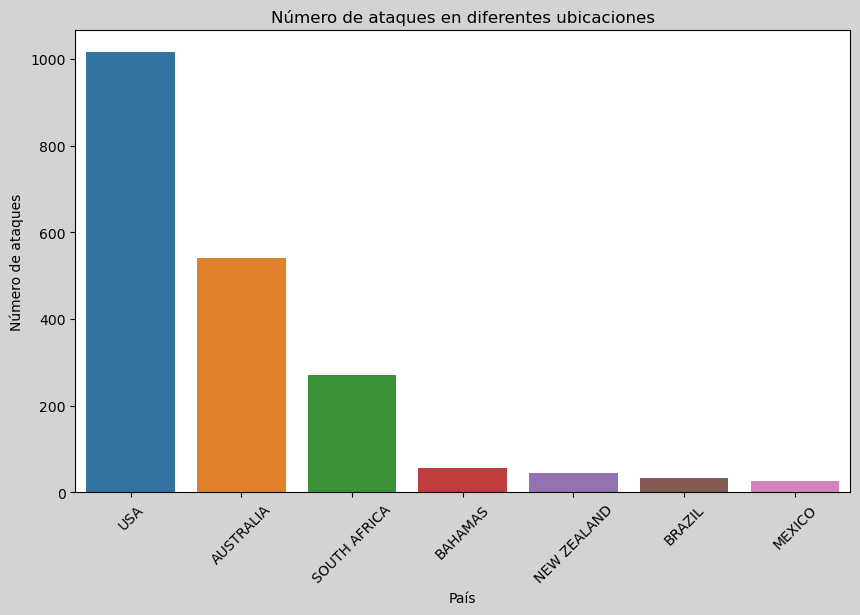

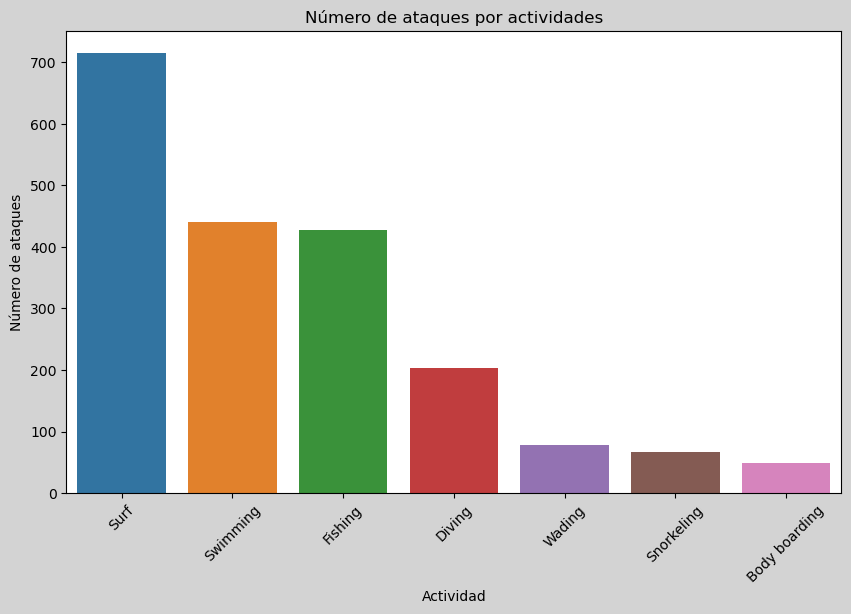

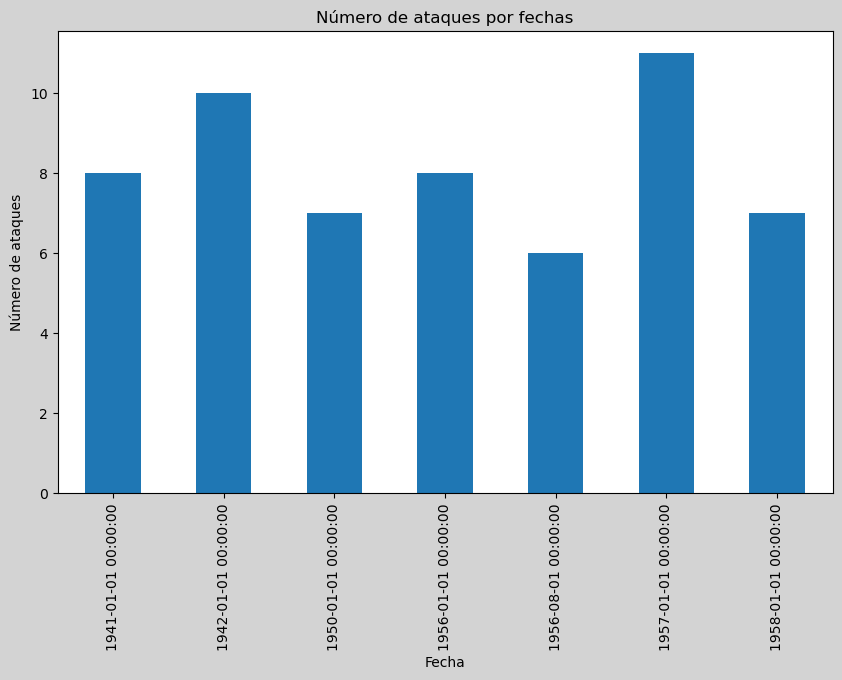

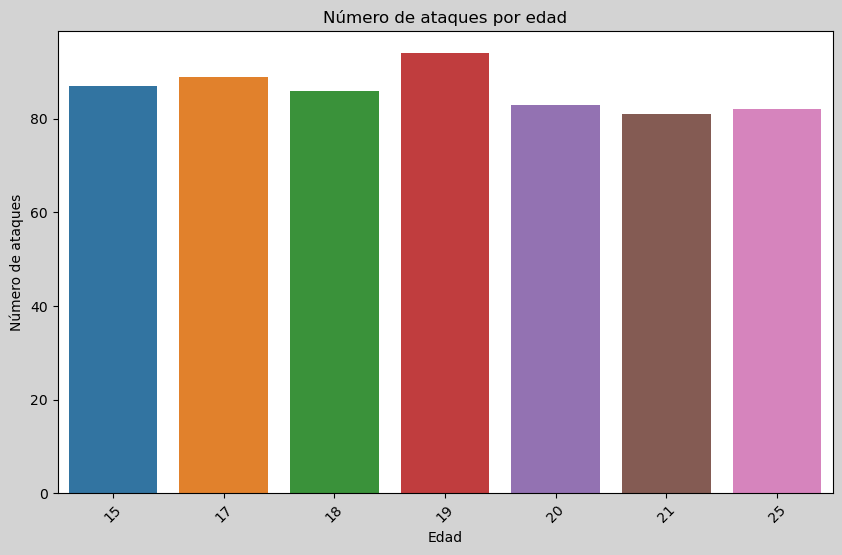

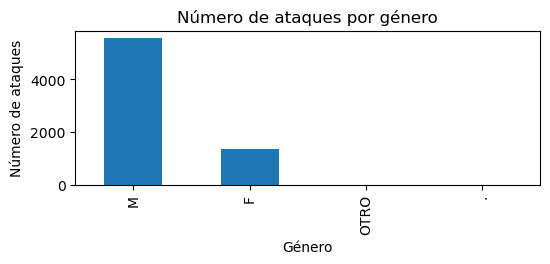

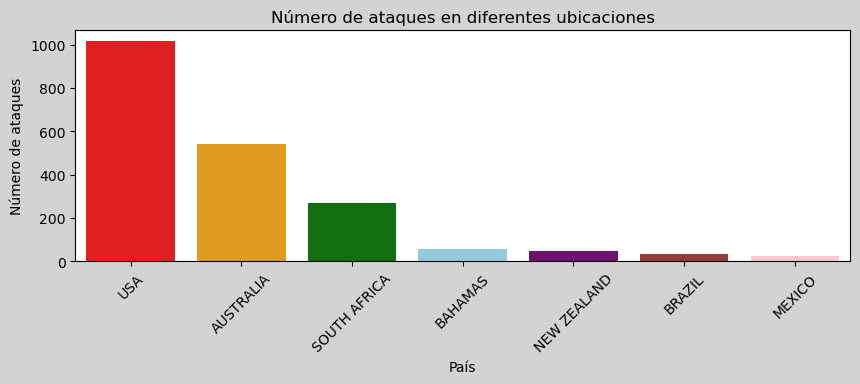

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

colors = ['red','orange', 'green', 'skyblue', 'purple', 'brown', 'pink', 'gray', 'cyan', 'magenta']
filtered_df = df_copy[(df_copy['age'] != 'no_especific') &(df_copy['species'] != 'no_specific') & (df_copy['activity'] != 'no_specific')& (df_copy['injury'] != 'no_specific')]

filtered_location_counts = filtered_df['country'].value_counts().head(7)
plt.figure(figsize=(10, 6),facecolor='lightgray')
sns.barplot(x=filtered_location_counts.index, y=filtered_location_counts.values)
plt.title('Número de ataques en diferentes ubicaciones')
plt.xlabel('País')
plt.ylabel('Número de ataques')
plt.xticks(rotation=45)
plt.show()


filtered_activity_counts = filtered_df['activity'].value_counts().head(7)
plt.figure(figsize=(10, 6),facecolor='lightgray')
sns.barplot(x=filtered_activity_counts.index, y=filtered_activity_counts.values)
plt.title('Número de ataques por actividades')
plt.xlabel('Actividad')
plt.ylabel('Número de ataques')
plt.xticks(rotation=45)
plt.show()

# Gráfico para Número de ataques por fechas 
top_date_counts = location_counts2.head(7)
plt.figure(figsize=(10, 6),facecolor='lightgray')
top_date_counts.sort_index().plot(kind='bar')
plt.title('Número de ataques por fechas')
plt.xlabel('Fecha')
plt.ylabel('Número de ataques')
plt.show()

filtered_age_counts = filtered_df['age'].value_counts().head(7)
plt.figure(figsize=(10, 6),facecolor='lightgray')
sns.barplot(x=filtered_age_counts.index, y=filtered_age_counts.values)
plt.title('Número de ataques por edad')
plt.xlabel('Edad')
plt.ylabel('Número de ataques')
plt.xticks(rotation=45)
plt.show()


gender_counts = df_copy['sex'].value_counts()
plt.figure(figsize=(6, 2))
gender_counts.plot(kind='bar')
plt.title('Número de ataques por género')
plt.xlabel('Género')
plt.ylabel('Número de ataques')
plt.show()

iltered_location_counts = filtered_df['country'].value_counts().head(7)
plt.figure(figsize=(10, 3), facecolor='lightgray') 
sns.barplot(x=filtered_location_counts.index, y=filtered_location_counts.values, palette=colors)
plt.title('Número de ataques en diferentes ubicaciones')
plt.xlabel('País')
plt.ylabel('Número de ataques')
plt.xticks(rotation=45)
plt.show()



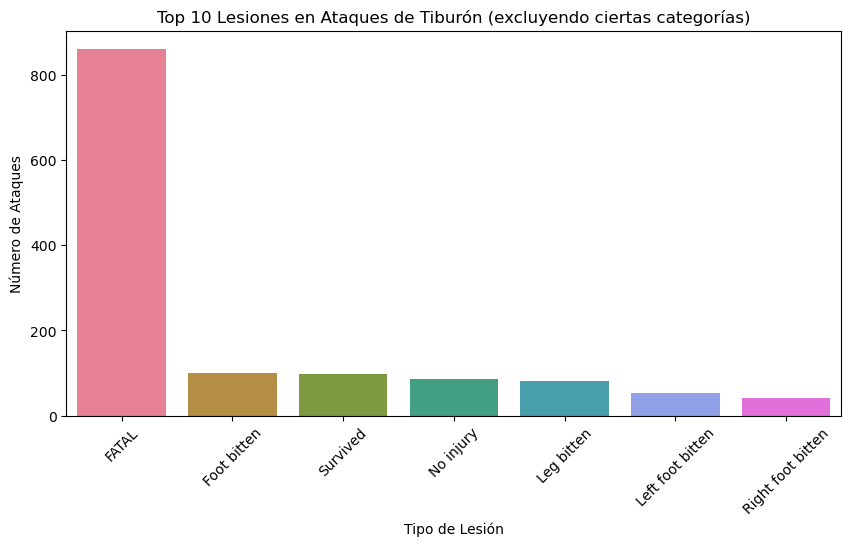

In [34]:
excluded_categories = ['survived', 'No details', 'no_especific']
df_filtered_injury = df_copy[~df_copy['injury'].isin(excluded_categories)]

injury_counts = df_filtered_injury['injury'].value_counts().head(7)
colors = sns.color_palette("husl", n_colors=len(injury_counts))

plt.figure(figsize=(10, 5))
sns.barplot(x=injury_counts.index, y=injury_counts.values, palette=colors)
plt.title('Top 10 Lesiones en Ataques de Tiburón (excluyendo ciertas categorías)')
plt.xlabel('Tipo de Lesión')
plt.ylabel('Número de Ataques')
plt.xticks(rotation=45)
plt.show()

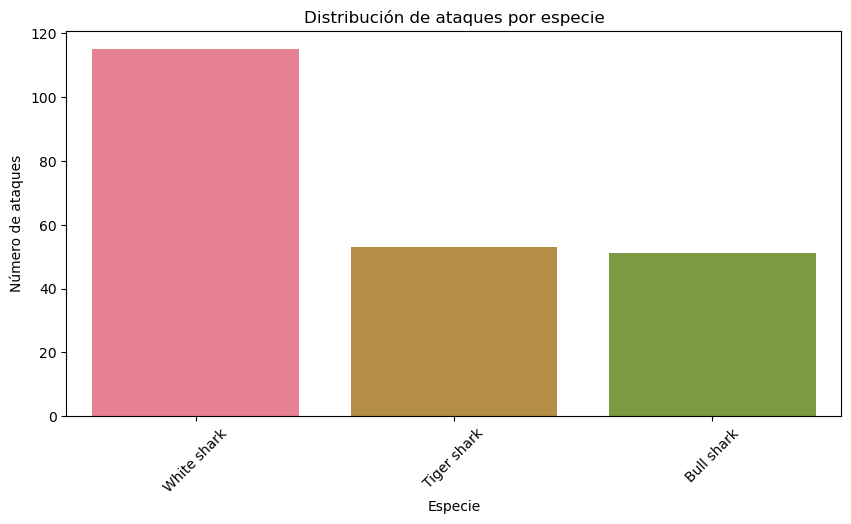

In [35]:
species_counts = filtered_df['species'].value_counts()

plt.figure(figsize=(10, 5))
sns.barplot(x=species_counts.head(3).index, y=species_counts.head(3).values, palette=colors)
plt.title('Distribución de ataques por especie')
plt.xlabel('Especie')
plt.ylabel('Número de ataques')
plt.xticks(rotation=45)
plt.show()